# OLS

In [1]:
# The basics
import numpy as np
import pandas as pd

# Cross validation and model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
import matplotlib.pylab as pl

from plot_actual_vs_pred import plot_actual_vs_pred

# Looping
import itertools

In [2]:
# Reading data
sensor = pd.read_csv('../../data/averaged_features_sensor1.csv')
sensor

,exposure,NO,NO2,NH3,0.05-1-slope-0,0.05-1-slope-1,0.05-1-slope-2,0.05-1-slope-3,0.05-1-slope-4,0.05-1-slope-5,...,2500.0-1-avg-230,2500.0-1-avg-231,5000.0-1-avg-232,5000.0-1-avg-233,5000.0-1-avg-234,5000.0-1-avg-235,5000.0-1-avg-236,5000.0-1-avg-237,5000.0-1-avg-238,5000.0-1-avg-239
0,0,5.0,5.0,5.0,-26.386178,-14.165356,-0.234640,-0.091757,-0.103611,-0.074383,...,35.418769,35.408092,35.281180,35.205123,35.206299,35.186754,35.183971,35.150467,35.162932,35.152458
1,1,5.0,5.0,10.0,-26.294332,-14.421532,-0.216090,-0.126324,-0.107321,-0.071034,...,34.869225,34.864293,34.732586,34.668700,34.649606,34.643928,34.639743,34.628251,34.622460,34.623591
2,2,5.0,5.0,20.0,-25.514491,-15.174588,-0.253371,-0.157995,-0.108769,-0.090761,...,35.287604,35.281044,35.147368,35.088776,35.064683,35.051404,35.046087,35.026926,35.025637,35.023103
3,3,5.0,5.0,40.0,-25.906221,-14.565139,-0.306851,-0.142612,-0.155371,-0.041716,...,34.835653,34.827193,34.692861,34.639381,34.608072,34.611329,34.597168,34.593820,34.575699,34.576649
4,4,5.0,5.0,80.0,-26.731849,-13.795072,-0.241065,-0.139716,-0.165596,-0.061352,...,35.112620,35.105132,34.979939,34.911710,34.899019,34.891848,34.873184,34.865515,34.860040,34.854340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,120,80.0,80.0,5.0,-27.073901,-13.562242,-0.218533,-0.112207,-0.119356,-0.104968,...,35.008036,34.999938,34.875876,34.795566,34.779550,34.769189,34.756339,34.753489,34.742313,34.749349
121,121,80.0,80.0,10.0,-26.329623,-14.337196,-0.120442,-0.155733,-0.177360,0.004253,...,34.931301,34.930781,34.800000,34.737336,34.714669,34.697521,34.697249,34.684468,34.678857,34.675690
122,122,80.0,80.0,20.0,-25.935631,-14.734990,-0.196363,-0.119447,-0.110036,-0.099629,...,34.621871,34.606443,34.487268,34.418043,34.394041,34.385965,34.385354,34.375468,34.354338,34.347416
123,123,80.0,80.0,40.0,-25.821070,-14.855702,-0.241336,-0.145870,-0.119989,-0.138449,...,34.579703,34.574523,34.447724,34.377097,34.364066,34.354248,34.334091,34.327146,34.327938,34.319839


In [3]:
# Location of slope and average features in the df (NOW WITH MIXTURE # AS DF INDEX!!!)
slope_idxs = list(range(4,244))
avg_idxs = list(range(244, 484))

# Independent variables - AVERAGE ONLY!!!!!!!!!!!!
X = np.asarray(sensor.iloc[:, avg_idxs])

# Dependent Variables - gas concentrations
Y = np.asarray(sensor.iloc[:, 1:4])

X, X_val, Y, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
steps = [('scaler', StandardScaler()),
         ('linreg', LinearRegression())]


pipe = Pipeline(steps)


# Fitting to training data (test data is implicitly inside CV search.)
pipe.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

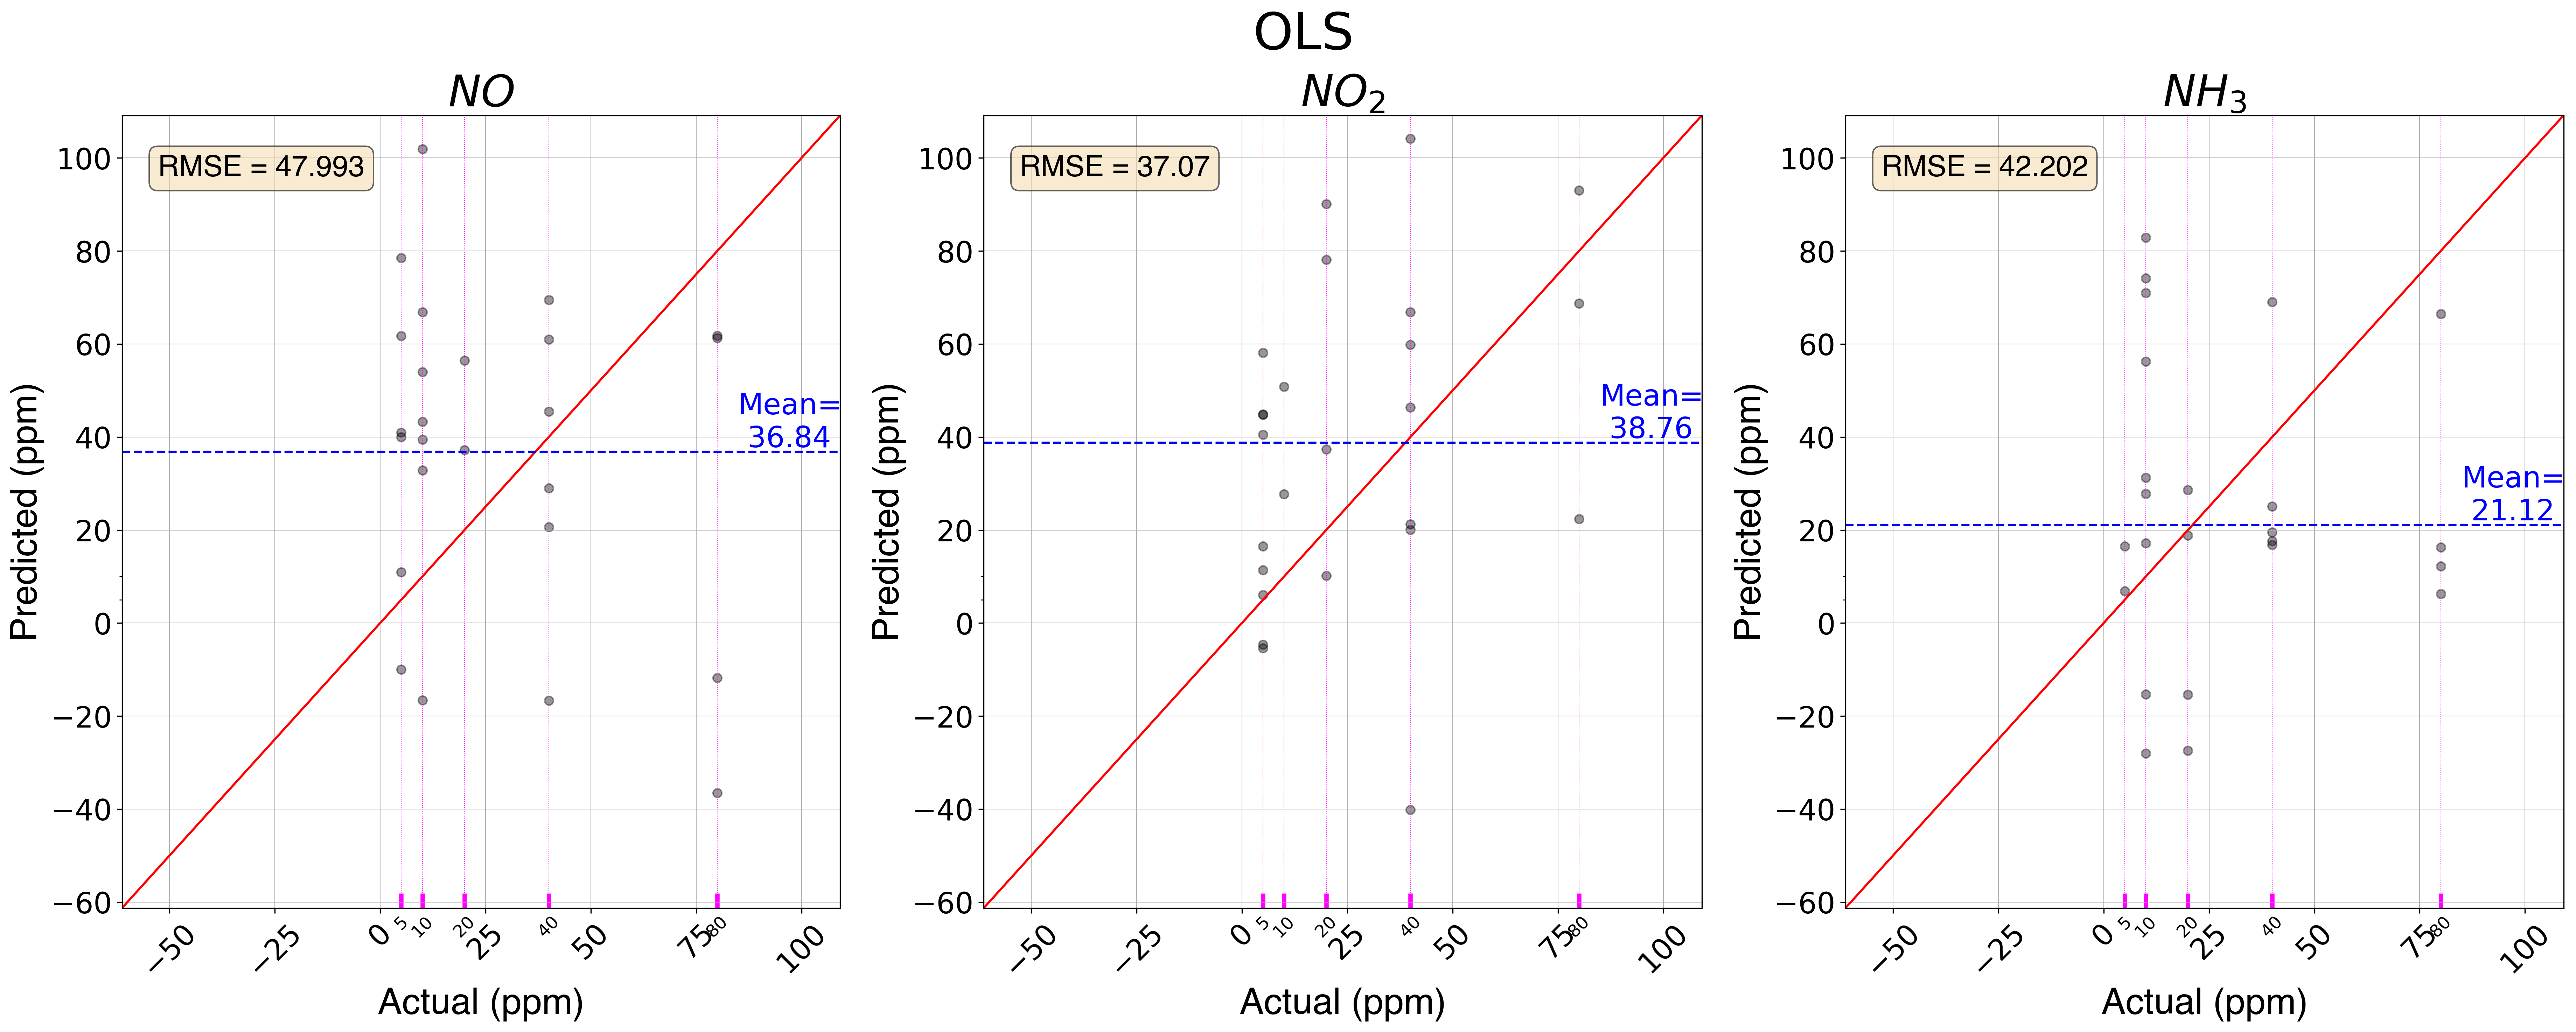

In [5]:
# Predicting on unseen validation data
Y_pred = pipe.predict(X_val)

# Plotting actual vs. predicted
# Information to display
RMSEs = np.round(mean_squared_error(Y_val, Y_pred, squared=False, multioutput = 'raw_values'), 3)

info = [f'RMSE = {RMSEs[i]}' for i in range(3)]
plot_actual_vs_pred(Y_val, Y_pred, 'OLS - MIXTURES WITH AVERAGES ONLY', info) 